# Rice Crop disease identifier
This projects itends to assist farmers with identifying rice crop disease using Machine Learning model

## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import compress_pickle

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import skimage
from skimage.io import imread,imshow
from skimage.feature import hog
from skimage.transform import rescale,resize

## Importing the dataset

In [7]:
src_path={'Bacterial Blight Disease':'Rice_Diseases/Bacterial Blight Disease',
'Blast Disease':'Rice_Diseases/Blast Disease',
'Brown Spot Disease':'Rice_Diseases/Brown Spot Disease',
'False Smut Disease':'Rice_Diseases/False Smut Disease'}
bacterial_blight=[]
blast=[]
brown_spot=[]
false_smut=[]

for disease, path in src_path.items():
    for file in os.listdir(path):
        if disease=='Bacterial Blight Disease':
            bacterial_blight.append(os.path.join(path, file))
        if disease=='Blast Disease':
            blast.append(os.path.join(path, file))
        if disease=='Brown Spot Disease':
            brown_spot.append(os.path.join(path, file))
        if disease=='False Smut Disease':
            false_smut.append(os.path.join(path, file))

In [8]:
print(bacterial_blight)
print(blast)
print(brown_spot)
print(false_smut)

['Rice_Diseases/Bacterial Blight Disease\\BB (1).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (10).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (11).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (12).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (13).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (14).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (15).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (16).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (17).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (18).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (19).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (2).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (20).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (21).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (22).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (23).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (24).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (25).jpg', 'Rice_Disea

In [9]:
print(len(bacterial_blight))
print(len(blast))
print(len(brown_spot))
print(len(false_smut))

50
50
50
50


## Visualisation

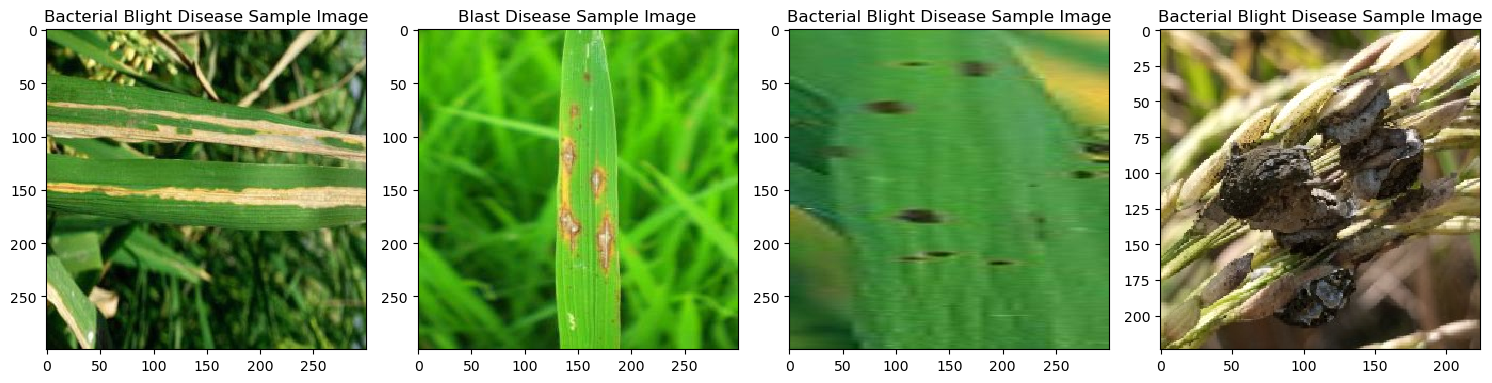

In [10]:
bacterial_sample_image=bacterial_blight[0]
blast_sample_image=blast[0]
brown_spot_sample_image=brown_spot[0]
false_smut_sample_image=false_smut[0]

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(bacterial_sample_image)

fig.add_subplot(1,4,2)
# plt.axis('off')
plt.title('Blast Disease Sample Image')
imshow(blast_sample_image)

fig.add_subplot(1,4,3)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(brown_spot_sample_image)

fig.add_subplot(1,4,4)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(false_smut_sample_image)

## Preprocess

In [11]:
combined_path_dataset=[]
for path in bacterial_blight:
    combined_path_dataset.append(path)
for path in blast:
    combined_path_dataset.append(path)

for path in brown_spot:
    combined_path_dataset.append(path)

for path in false_smut:
    combined_path_dataset.append(path)





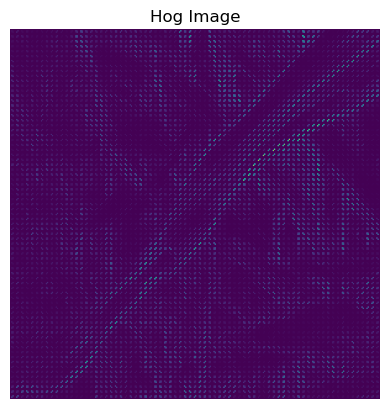

<function hog at 0x0000018823873E20>


In [12]:
path=combined_path_dataset[12]
image=imread(path,as_gray=True)
rescaled_image=resize(image,(200,200))
# dasify,daisified_image=daisy(rescaled_image,step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
# fig=plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
# imshow(rescaled_image)
# plt.subplot(1,2,2)
# imshow(image)
# print(dasify.shape)
hogify, hog_img = hog(
    image, orientations=8,
    pixels_per_cell=(4, 4),
    cells_per_block=(8,8),
    visualize=True
)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(hog_img)
ax.set_title(f"Hog Image")
plt.show()
print(hog)

In [13]:
hogified_images=[]
for path in combined_path_dataset:
    image=imread(path,as_gray=True)
    resized_image=resize(image,(200,200))
    hogify= hog(resized_image, 
                orientations=8,
                pixels_per_cell=(8, 8),
                cells_per_block=(16,16)
                )
    print(hogify.shape)
    hogified_images.append(hogify)


(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)
(204800,)


## Building Dataset and Training Model 

In [14]:
x=hogified_images

y=[]
for i in range(0,200):
    if(i<50):
        y.append(1)
    if(i>49 and i<100):
        y.append(2)
    if(i>99 and i<150):
        y.append(3)
    if(i>149 and i<200):
        y.append(4)

In [15]:
print(x[0].shape)
print(x[1])
print(y)

(204800,)
[0.02445572 0.00418251 0.00146136 ... 0.00282455 0.01070439 0.0340804 ]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
mlpc=MLPClassifier(activation='identity',alpha=0.0001,batch_size=32,hidden_layer_sizes=(150,150,150), learning_rate= 'adaptive',
                   max_iter=10,solver='adam',tol=1e-8,verbose=True)

mlpc.fit(xtrain,ytrain)

Iteration 1, loss = 8.06554481
Iteration 2, loss = 3.50227264
Iteration 3, loss = 1.41810869
Iteration 4, loss = 0.44934796
Iteration 5, loss = 0.28617521
Iteration 6, loss = 0.10815658
Iteration 7, loss = 0.06898835
Iteration 8, loss = 0.01977516
Iteration 9, loss = 0.01323568
Iteration 10, loss = 0.00912996


d:\IDEs\anaconda\envs\rice-disease\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', batch_size=32,
              hidden_layer_sizes=(150, 150, 150), learning_rate='adaptive',
              max_iter=10, tol=1e-08, verbose=True)

In [18]:
ypred=mlpc.predict(xtest)
print(f"accuracy:{accuracy_score(ypred,ypred)}")

accuracy:1.0


## Deploying the model

In [19]:
# ['bz2', 'gzip', 'lzma', None, 'pickle', 'zipfile']
pickle.dump(mlpc,open("model_100.pkl",'wb'))


In [26]:
mlpc=pickle.load(open('D:\IDEs/anaconda\envs/rice-disease\model\model_100.pkl','rb'))